
# Project: Is It Possible To Predict No-Shows For Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We want to look at a medical appointments dataset to examine whether or not we can predict if a patient will "no-show" for an appointment.  The original data came from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

The dataset being used contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

*  *`PatientId`* Identification of a patient 
*  *`AppointmentID`* - Identification of each appointment 
*  *`Gender`* Male or Female. 
*  *`AppointmentDay`*  The day of the actuall appointment, when they have to visit the doctor. 
*  *`ScheduledDay`* The day someone called or registered the appointment, this is before appointment of course. 
*  *`Age`* How old is the patient. 
*  *`Neighbourhood`* Where the appointment takes place. 
*  *`Scholarship`* indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1521066273745000&usg=AFQjCNF5UGZiiS3dtWhyq6kGN9ZFFACskw).
*  *`Hipertension`* = True or False 
*  *`Diabetes`* = True or False 
*  *`Alcoholism`* = True=1 or False=0 
*  *`Handcap`* = True=1 or False=0 
*  *`SMS_received`* = 1 or more messages sent to the patient. 
*  *`No-show`* indicates whether or not the patient showed up for the appointment. 
    *  A value of `No` means that the patient *did* show up.  
    *  A value of `Yes` means that the patient was a *no-show* and *did not* show up for the appointment.
    
### Questions to examine
Some questions we can examine with this data include:

*  Is there a correlation between the number of days in advance an appointment is made to it becomeing a no-show?  We suspect that "same-day" appointments are seldom no-shows because they are probably "walk-ins".
*  Is there a correlation between the age or gender of a patient for an appointment and that appointment becomeing a no-show?
*  Is there a correlation between receiving a text message before an appointment and that appointment being a no-show? What about if we exclude "same-day" appointments (assuming that these are "walk-ins")?

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# read the data from the file
df = pd.read_csv('data/noshowappointments-kagglev2-may-2016.csv')
# print out a few lines
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# See how much data we have to work with
df.shape

(110527, 14)

In [4]:
# Check for missing values
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# check the types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


After some initial data inspection.  We notice a few things that need to be cleaned.

* The schedule day and appointment day are strings, but should probably be a datetime.
* The patient id is a float64, but should probably be a string.

Go back and reimport the data using `parse_dates=[3,4]` to import the dates as datetime objects since the columns are in [ISO-8601](https://en.wikipedia.org/wiki/ISO_8601) format and should easily be converted on input. and add `dtype={'PatientId': object}` to force the `PatientId` column to be a string.


In [6]:
df = pd.read_csv('data/noshowappointments-kagglev2-may-2016.csv',dtype={'PatientId': object},parse_dates=[3,4])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 11.8+ MB


`AppointmentID` seems like it might be a natural choice for an index column.  Let's make sure that there are no missing values and that they all are unique.

In [7]:
len(df['AppointmentID'].unique())

110527

The values in `AppointmentID` are unique, so let's set that column as the index column for the dataframe.

In [8]:
df.set_index('AppointmentID', inplace=True)

Looking back at the `describe()` results, I can see that the `Age` min is `-1`. Let's see how many rows are in that category. 

In [9]:
len(df[df['Age']<0])

1

Since it's only one row, we could just delete that from the set, but instead, let's replace the age in that rows with the average age.  Assuming that all the `Age=0` are infants and that `-1` is just an error.

The cleaning operations will generate some warnings that we can ignore about chained assignemnt.  Supporess those, too.

In [10]:
pd.options.mode.chained_assignment = None # suppress setting with copy warning
mean_age = int(df[df['Age']>=0]['Age'].mean()) 
neg_age = df['Age'] < 0
df['Age'][neg_age] = mean_age
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

`Handcap` looks like it has values besides just `0` and `1`, but this is supposed to be a "boolean" value.  Let's treat anything that is not zero as one.

In [11]:
non_zero_handicap = df['Handcap'] > 0
df['Handcap'][non_zero_handicap] = 1
df['Handcap'].unique()

array([0, 1])

For consistency sake, and in order to easily count by summing, let's change the `No-show` column to use `0` and `1` like the other boolean columns

In [12]:
no_show_yes = df['No-show'] == 'Yes'
no_show_no  = df['No-show'] == 'No'
df['No-show'][no_show_yes] = 1
df['No-show'][no_show_no] = 0
df[['No-show']] = df[['No-show']].apply(pd.to_numeric)
df['No-show'].unique()

array([0, 1])

In [13]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089218,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026,0.201933
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873,0.401444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 13 columns):
PatientId         110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.8+ MB


In [15]:
df.head(10)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
5642503,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
5642549,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
5642828,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
5642494,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5626772,95985133231274,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0
5630279,733688164476661,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1
5630575,3449833394123,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1
5638447,56394729949972,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

### Number of days in advance an appointment is made
Is there a correlation between the number of days in advance an appointment is made to it becomeing a no-show? We suspect that "same-day" appointments are seldom no-shows because they are probably "walk-ins", and that an appointment made far in advance increases the liklihood that it is a no-show just because it becomes easier to forget.


In [43]:
# first let's add another column that holds the days in advance an appointment is made
df['DaysInAdvance'] = (df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date).dt.days
df.head()
day_adv_values = df['DaysInAdvance'].unique()
day_adv_values.sort()
print(day_adv_values)

[ -6  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98 101 102 103 104 105 107 108
 109 110 111 112 115 117 119 122 123 125 126 127 132 133 139 142 146 151
 155 162 169 176 179]


That's interesting.  Some appointments are scheduled after the date of the appointment itself. Now let's build histograms that show compare the days in advance between no-show and non-no-show appointments

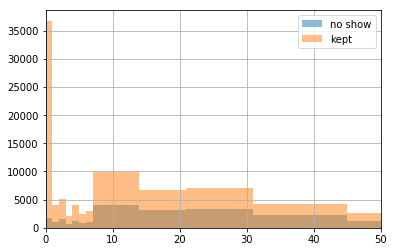

In [74]:
# create indexes that let us look at the two subsets independently
no_show_ix = df['No-show'] == 1
non_no_show_ix = df['No-show'] == 0
hbins = [-6,0,1,2,3,4,5,6,7,14,21,31,45,90,120,150,180]
# now create a histogram showing the distribution for the two types of appointments
df.DaysInAdvance[no_show_ix].hist(alpha=0.5, bins=hbins, label='no show')
df.DaysInAdvance[non_no_show_ix].hist(alpha=0.5, bins=hbins, label='kept')
# There are just a few of the "scheduled after the appointment", so we can exclude them from the plot 
# There's a pretty long tail to this data that makes the plot hard to read, so let's exclude them too.
plt.xlim(0,50)
plt.legend();

As expected, the plot shows that there is a huge spike of "kept" appointments when scheduled the same day.  That makes sense.  Interestingly, though, the expected rise in "no-shows" is not there as the scheduing advance increases.  Let's look at the advance schedule stats for "no-shows".

In [77]:
df.DaysInAdvance[no_show_ix].quantile([.25, .5, .75, .90, .95, .99, .999])

0.250      4.000
0.500     11.000
0.750     23.000
0.900     35.000
0.950     47.000
0.990     73.000
0.999    137.092
Name: DaysInAdvance, dtype: float64

### Age or gender of a patient
Is there a correlation between the age or gender of a patient for an appointment and that appointment becomeing a no-show?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Text message before an appointment 
Is there a correlation between receiving a text message before an appointment and that appointment being a no-show? What about if we exclude "same-day" appointments (assuming that these are "walk-ins")?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!